## Universidad del Valle de Guatemala - 22/07/2022
## Laboratorio 1
### Integrantes
Jose Abrahama Gutierrez Corado - 19111

Walter Danilo Saldaña - 19897

Javier Alejandro Cotto Argueta -19324


### Importar Modulos

In [2]:
import pandas as pd
from apyori import apriori   # pip3 install apyori
import matplotlib.pyplot as plt
import seaborn as sns

### Carga de Datos y Resumen Estadistico

In [3]:
df = pd.read_csv('./train.csv')

In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### DESCRIPCIÓN DE VARIABLES


MSSubClass - CATEGÓRICA

MSZoning - CATEGÓRICA

LotFrontage - CUANTITATIVA DISCRETA

LotArea - CUANTITATIVA DISCRETA

Street - CATEGÓRICA

Alley - CATEGÓRICA

LotShape - CUALITATIVA

LandContour - CUALITATIVA

Utilities - CATEGÓRICA

LotConfig - CUALITATIVA

LandSlope - CUALITATIVA

Neighborhood - CATEGÓRICA

Condition1 - CATEGÓRICA

Condition2 -CATEGÓRICA

BldgType - CATEGÓRICA

HouseStyle - CATEGÓRICA

OverallQual - CUALITATIVA

OverallCond - CUALITATIVA

YearBuilt - CUANTITATIVA DISCRETA

YearRemodAdd - CUANTITATIVA DISCRETA

RoofStyle - CATEGÓRICA

RoofMatl - CUALITATIVA

Exterior1st - CATEGÓRICA

Exterior2nd - CATEGÓRICA

MasVnrType - CUALITATIVA

MasVnrArea - CUANTITATIVA DISCRETA

ExterQual - CUALITATIVA

ExterCond - CUALITATIVA

Foundation - CUALITATIVA

BsmtQual - CUALITATIVA

BsmtCond - CUALITATIVA

BsmtExposure - CUALITATIVA

BsmtFinType1 - CUALITATIVA

BsmtFinSF1 - CATEGÓRICA

BsmtFinType2 - CUALITATIVA

BsmtFinSF2 - CATEGÓRICA

BsmtUnfSF - CUANTITATIVA DISCRETA

TotalBsmtSF - CUANTITATIVA DISCRETA

Heating - CATEGÓRICA

HeatingQC - CUALITATIVA

CentralAir - CATEGÓRICA

Electrical - CATEGÓRICA

1stFlrSF - CUANTITATIVA DISCRETA

2ndFlrSF - CUANTITATIVA DISCRETA

LowQualFinSF - CUANTITATIVA DISCRETA

GrLivArea - CUANTITATIVA DISCRETA

BsmtFullBath - CUANTITATIVA DISCRETA

BsmtHalfBath - CUANTITATIVA DISCRETA

FullBath - CUANTITATIVA DISCRETA

HalfBath - CUANTITATIVA DISCRETA

BedroomAbvGr - CUANTITATIVA DISCRETA

KitchenAbvGr - CUANTITATIVA DISCRETA

KitchenQual - CUALITATIVA

TotRmsAbvGrd - CUANTITATIVA DISCRETA

Functional - CUALITATIVA

Fireplaces - CUANTITATIVA DISCRETA

FireplaceQu - CUALITATIVA

GarageType - CUALITATIVA

GarageYrBlt - CUANTITATIVA DISCRETA

GarageFinish - CUANTITATIVA DISCRETA

GarageCars - CUANTITATIVA DISCRETA

GarageArea - CUANTITATIVA DISCRETA

GarageQual - CUALITATIVA

GarageCond - CATEGÓRICA

PavedDrive - CATEGÓRICA

WoodDeckSF - CUANTITATIVA DISCRETA

OpenPorchSF - CUANTITATIVA DISCRETA

EnclosedPorch - CUANTITATIVA DISCRETA

3SsnPorch - CUANTITATIVA DISCRETA

ScreenPorch - CUANTITATIVA DISCRETA

PoolArea - CUANTITATTIVA DISCRETA

PoolQC - CUANTITATIVA DISCRETA

Fence - CUALITATIVA

MiscFeature - CUALITATIVA

MiscVal - CUANTITATIVA DISCRETA

MoSold - CATEGÓRICA

YrSold - CATEGÓRICA

SaleType - CATEGÓRCA

SaleCondition - CATEGÓRICA

SalePrice - CUANTITATIVA DISCRETA

### Limpieza de datos y gráficos correspondientes

In [6]:
dfDrop = df.drop(['Street', 'Id', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                         'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle','RoofStyle', 
                         'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
                         'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                         'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
                         'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive','PoolQC', 'Fence', 'MiscFeature', 
                         'SaleType', 'SaleCondition'], axis=1)

dfDrop.dropna(subset = ["LotFrontage"], inplace = True)
dfDrop.dropna(subset = ["MasVnrArea"], inplace = True)
dfDrop.dropna(subset = ["GarageYrBlt"], inplace = True)

In [7]:
dfDrop

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


#### En este apartado vamos a imprimir diagrmas de cajas y bigotes he histogramas, para ver si existen datos atipicos, datos iguales o similares, y poder ver cual es la tendencia de cada uno de estas columnas.

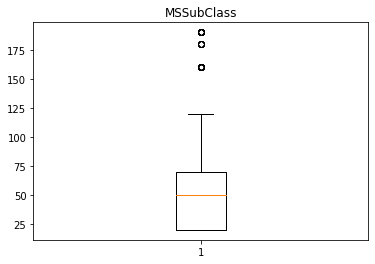

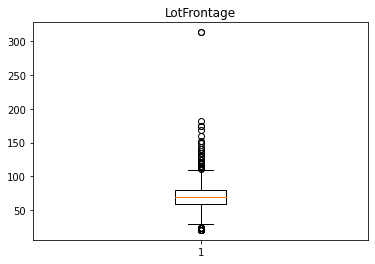

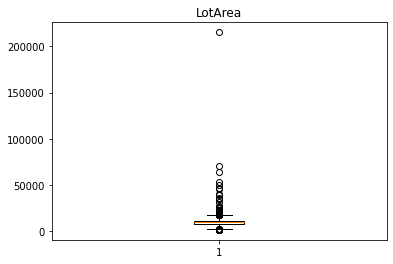

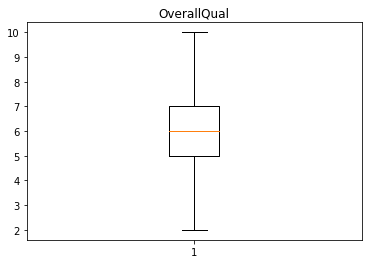

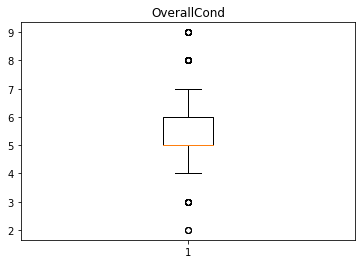

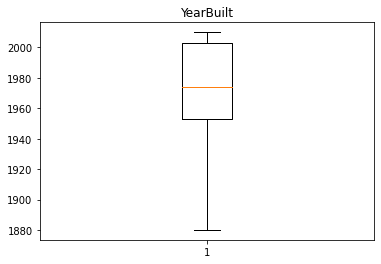

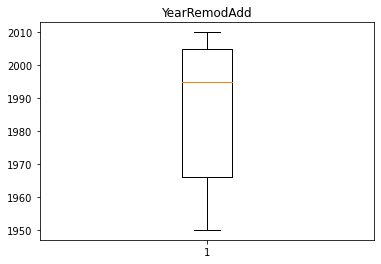

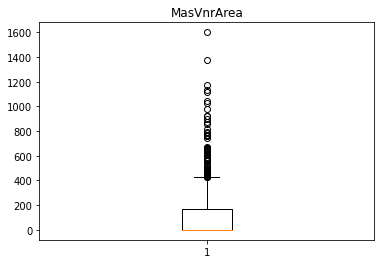

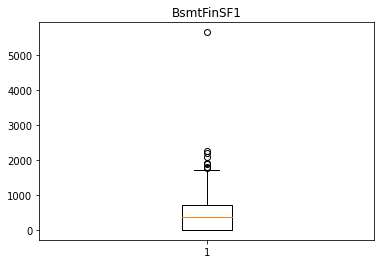

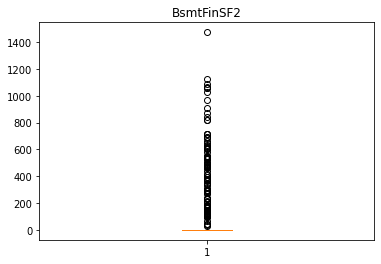

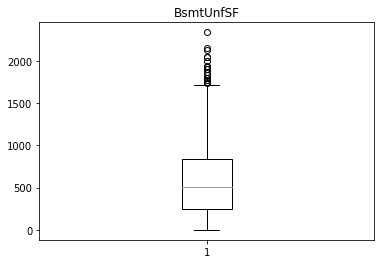

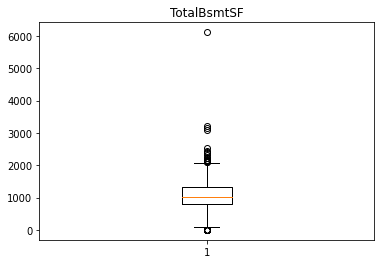

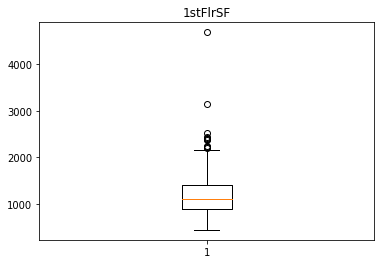

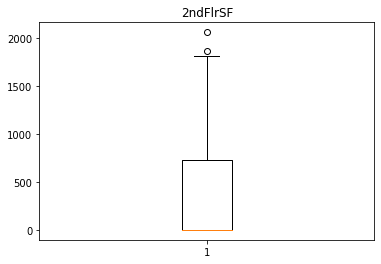

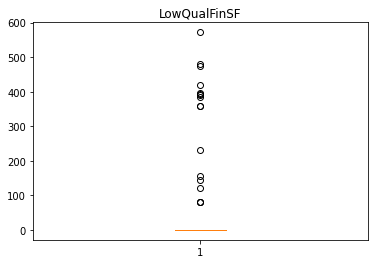

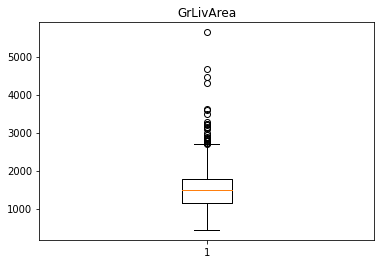

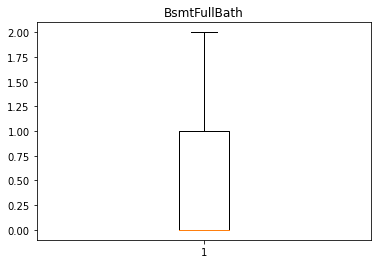

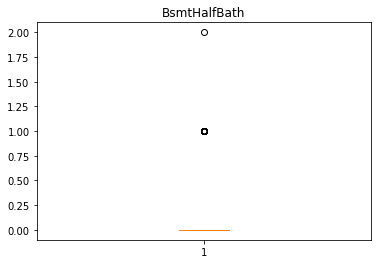

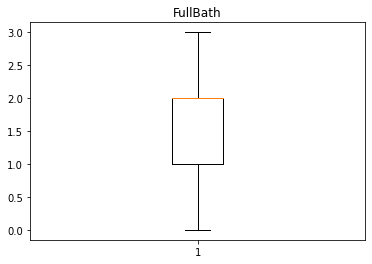

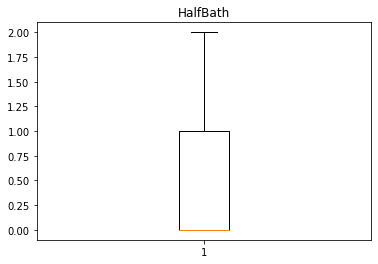

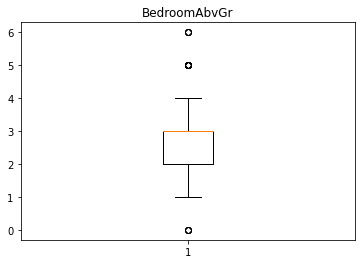

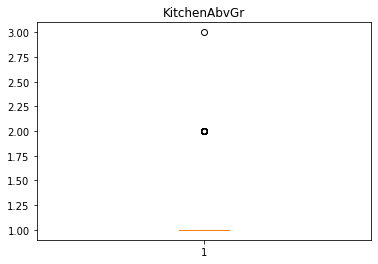

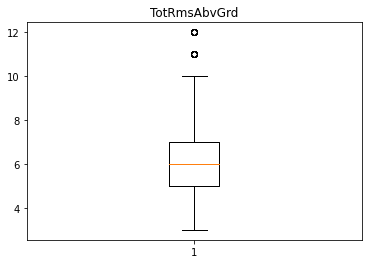

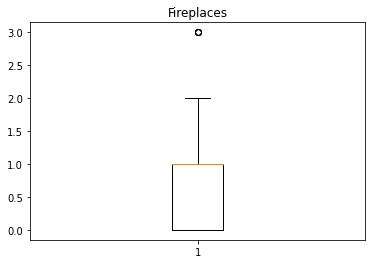

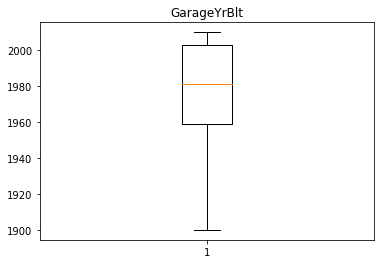

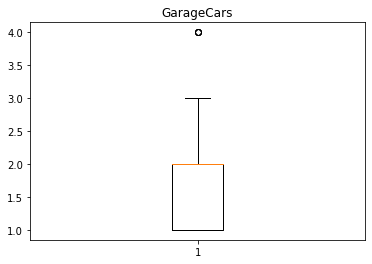

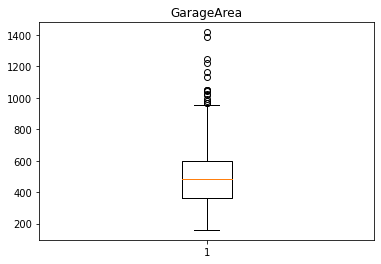

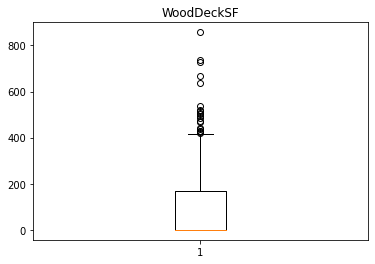

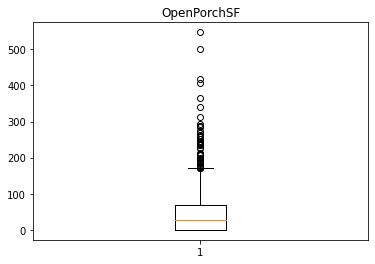

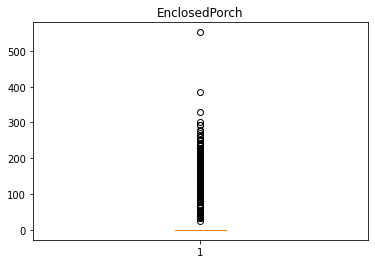

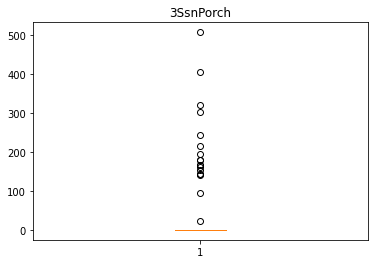

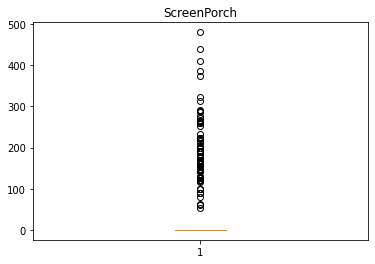

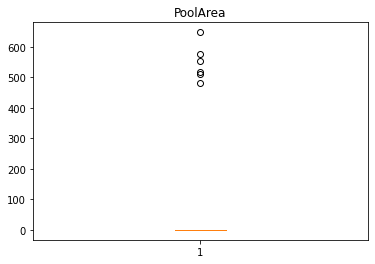

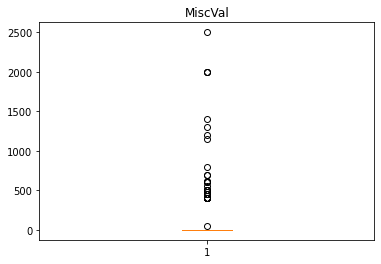

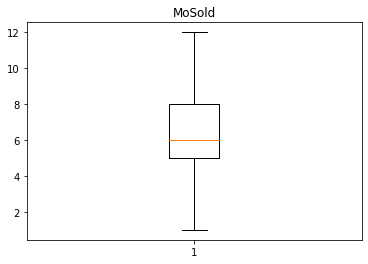

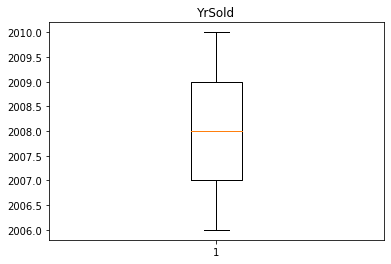

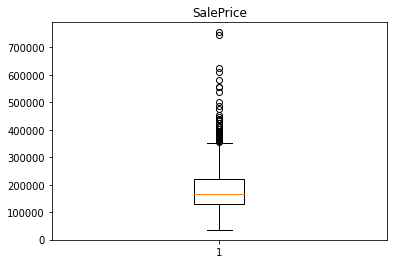

In [8]:
columns = []
for col in dfDrop.columns:
    columns.append(col)
    
for columna in columns:
    plt.boxplot(dfDrop[columna])
    plt.title(columna)
    plt.show()

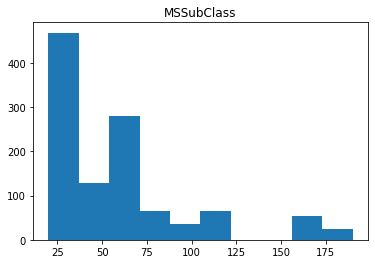

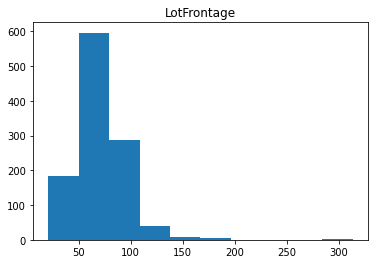

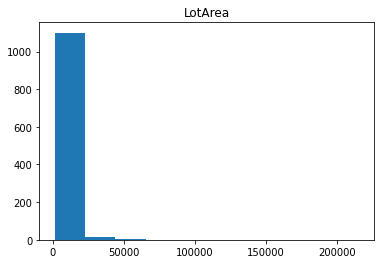

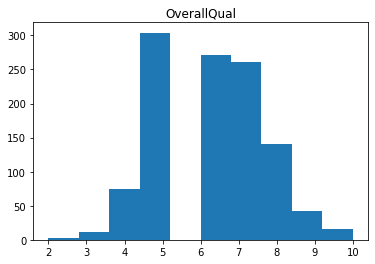

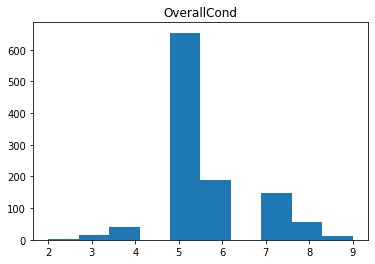

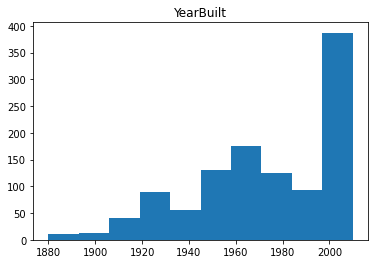

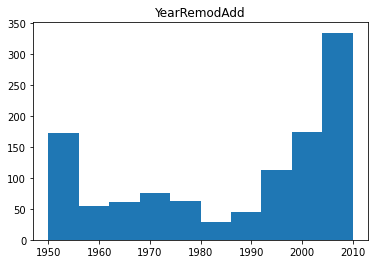

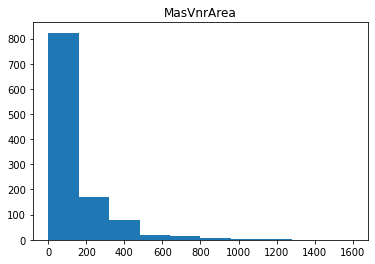

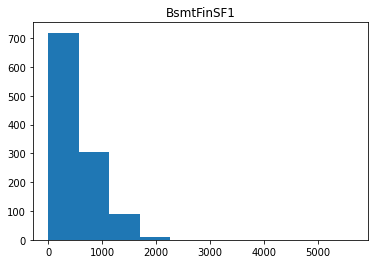

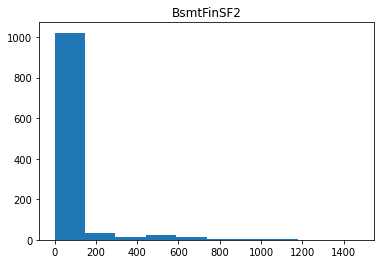

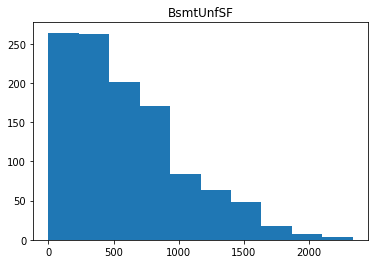

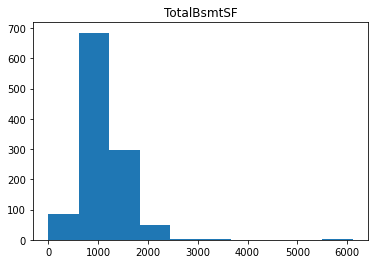

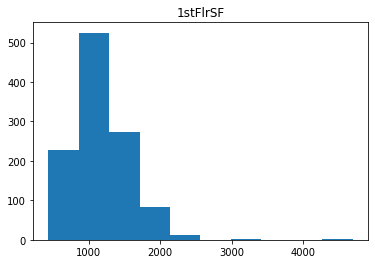

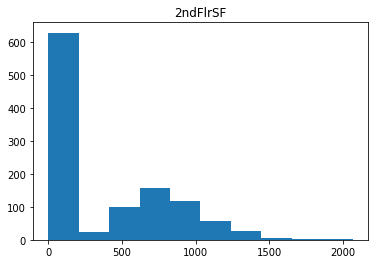

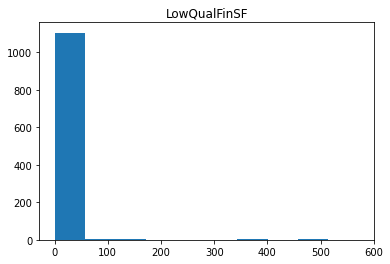

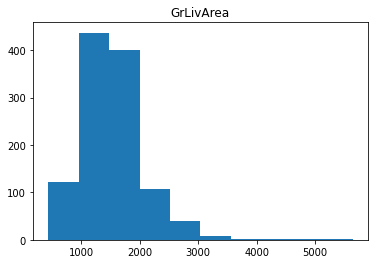

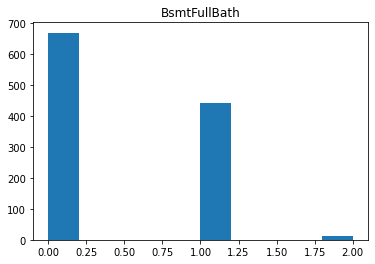

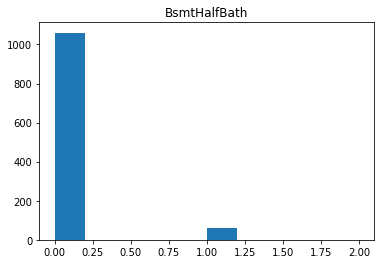

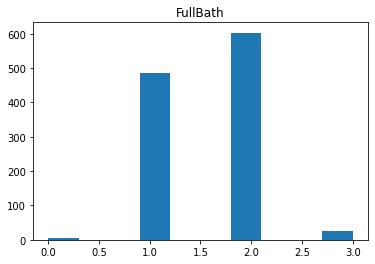

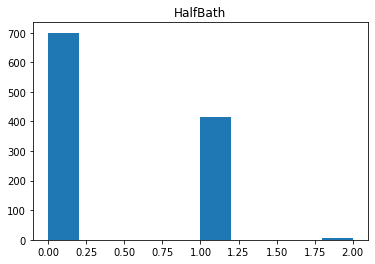

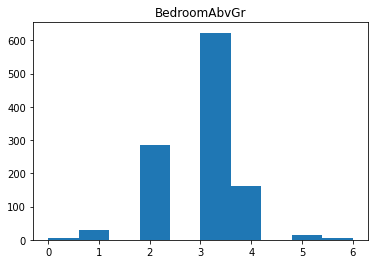

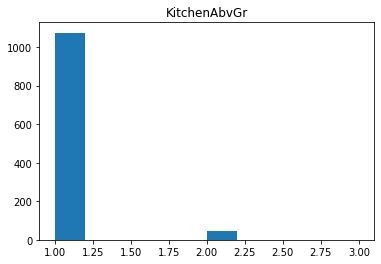

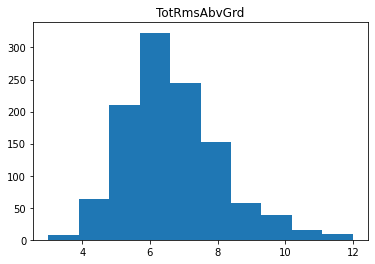

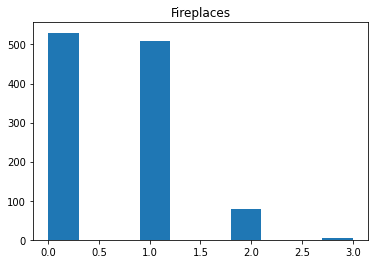

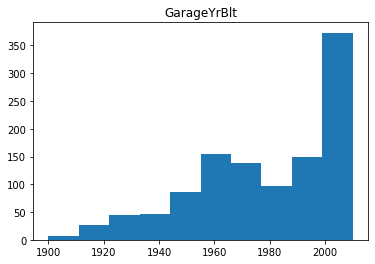

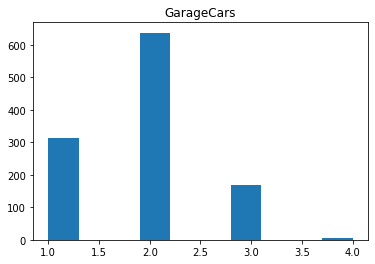

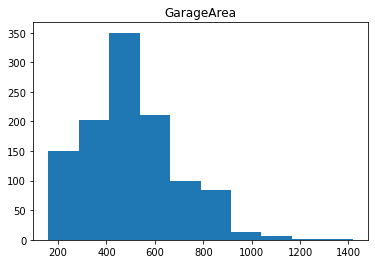

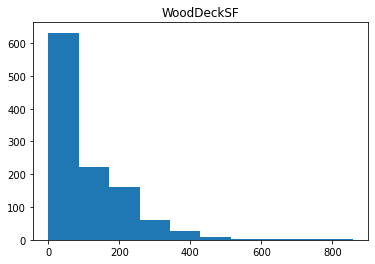

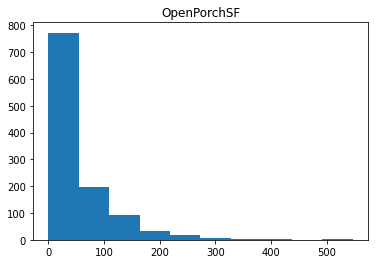

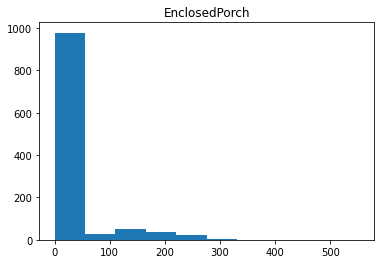

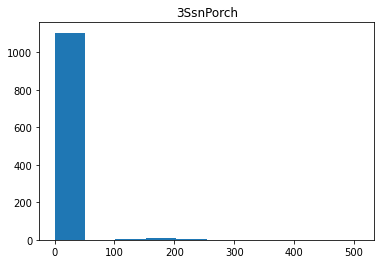

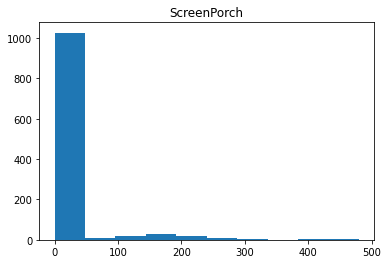

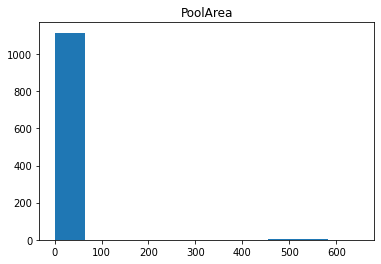

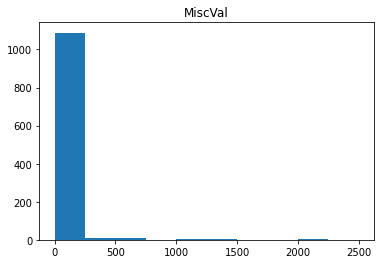

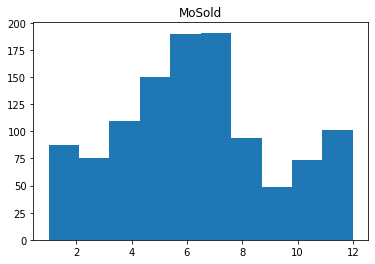

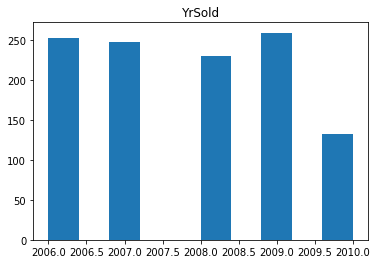

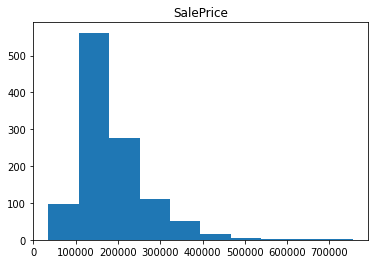

In [9]:
columns = []
for col in dfDrop.columns:
    columns.append(col)
    
for columna in columns:
    plt.hist(dfDrop[columna])
    plt.title(columna)
    plt.show()

## Análisis de correlación

<AxesSubplot:>

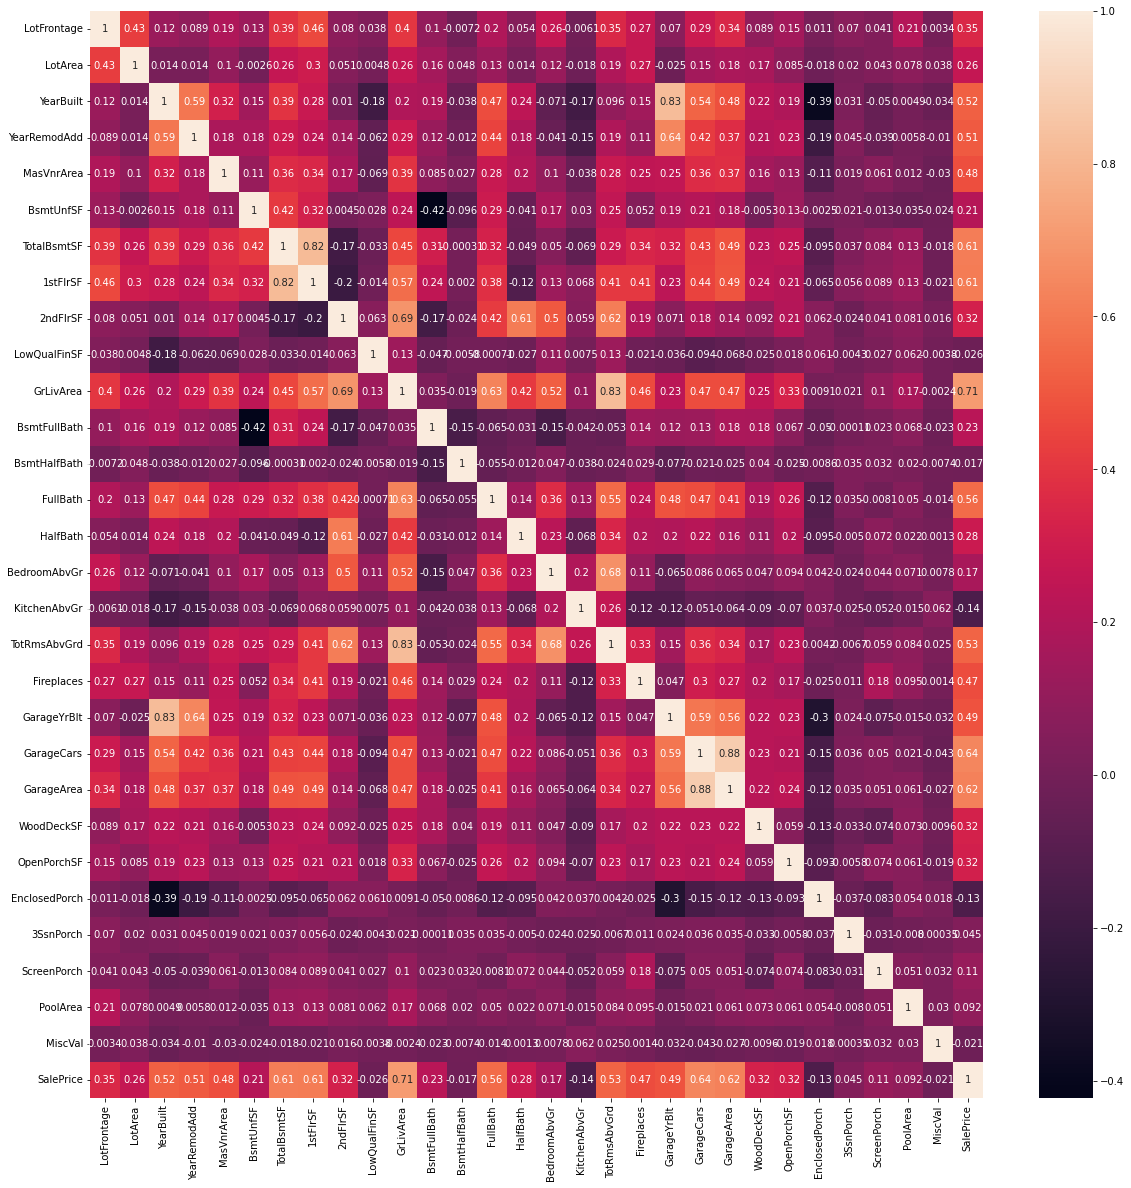

In [19]:
correlacion_numericas = df[[
    'LotFrontage',
    'LotArea',
    'YearBuilt',
    'YearRemodAdd',
    'MasVnrArea',
    'BsmtUnfSF',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'LowQualFinSF',
    'GrLivArea',
    'BsmtFullBath',
    'BsmtHalfBath',
    'FullBath',
    'HalfBath',
    'BedroomAbvGr',
    'KitchenAbvGr',
    'TotRmsAbvGrd',
    'Fireplaces',
    'GarageYrBlt',
    'GarageFinish',
    'GarageCars',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
    'EnclosedPorch',
    '3SsnPorch',
    'ScreenPorch',
    'PoolArea',
    'PoolQC',
    'MiscVal',
    'SalePrice'
]].corr()

fig, axis = plt.subplots(figsize=(20,20))

sns.heatmap(
    correlacion_numericas,
    xticklabels=correlacion_numericas.columns,
    yticklabels=correlacion_numericas.columns,
    annot=True,
    ax=axis
)

## Análisis de variables categóricas
### Tablas de frecuencia y gráficas de barras

========================================STREET======================================== 

  Street  Count
0   Pave   1454
1   Grvl      6


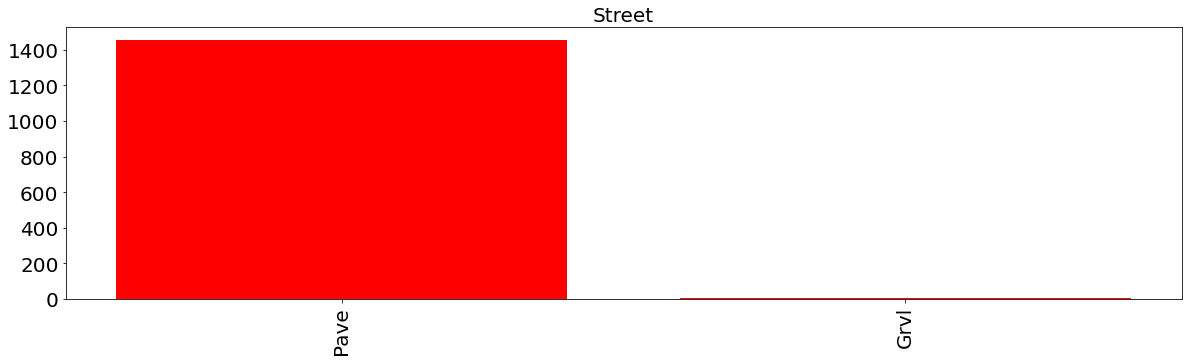




========================================MSZONING======================================== 

  MSZoning  Count
0       RL   1151
1       RM    218
2       FV     65
3       RH     16
4  C (all)     10


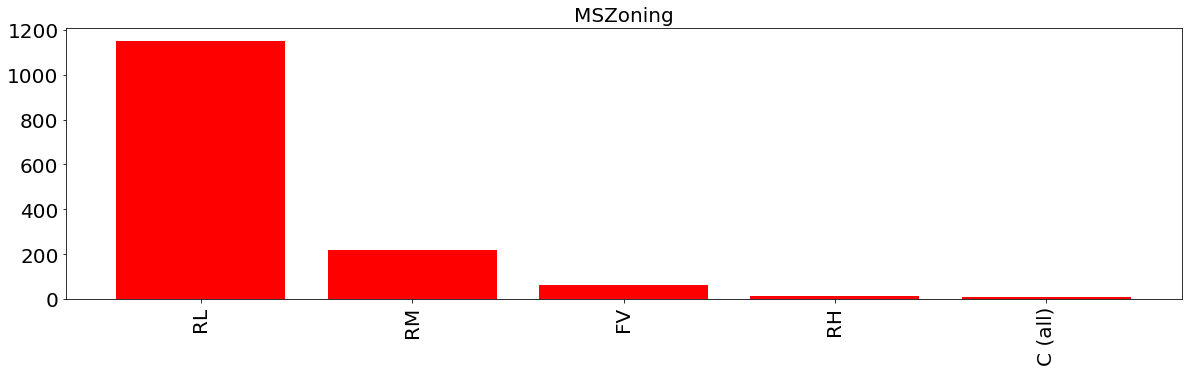




========================================ALLEY======================================== 

  Alley  Count
0  Grvl     50
1  Pave     41


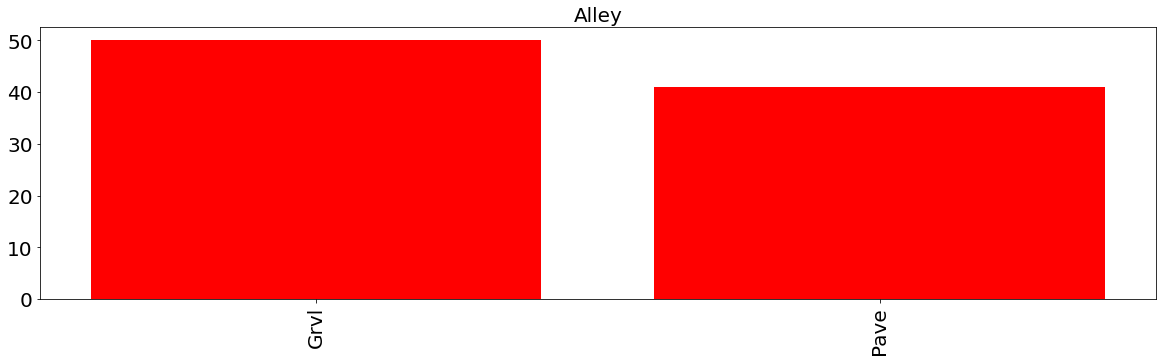




========================================LOTSHAPE======================================== 

  LotShape  Count
0      Reg    925
1      IR1    484
2      IR2     41
3      IR3     10


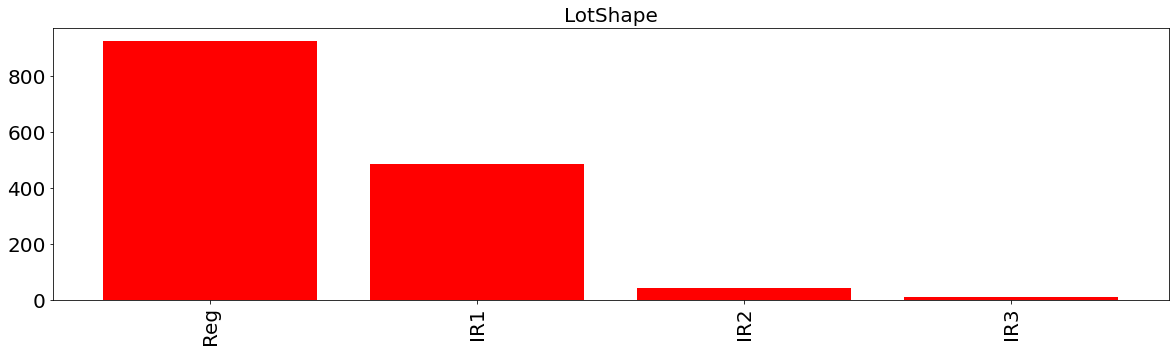




========================================LANDCONTOUR======================================== 

  LandContour  Count
0         Lvl   1311
1         Bnk     63
2         HLS     50
3         Low     36


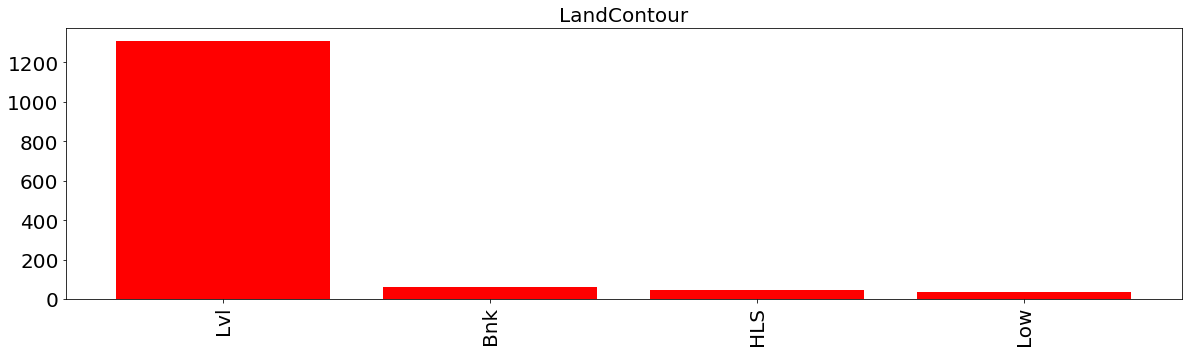




========================================UTILITIES======================================== 

  Utilities  Count
0    AllPub   1459
1    NoSeWa      1


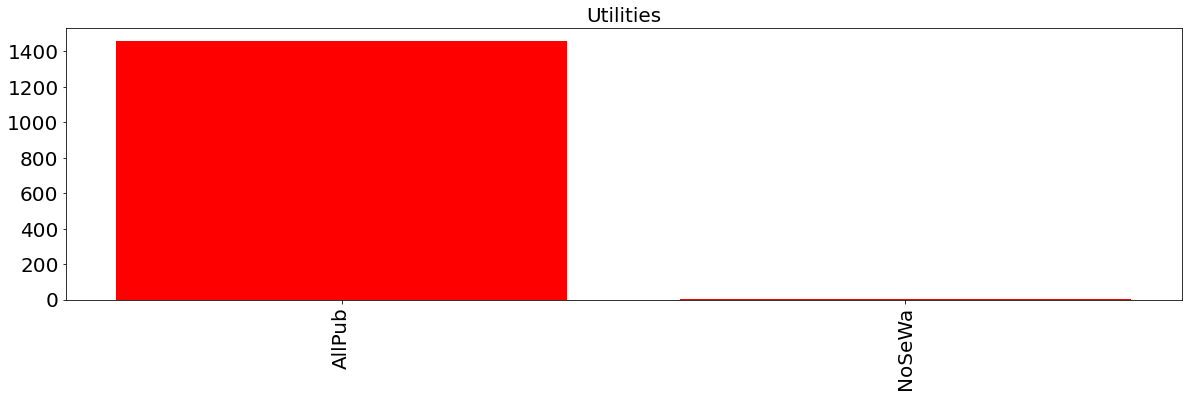




========================================LOTCONFIG======================================== 

  LotConfig  Count
0    Inside   1052
1    Corner    263
2   CulDSac     94
3       FR2     47
4       FR3      4


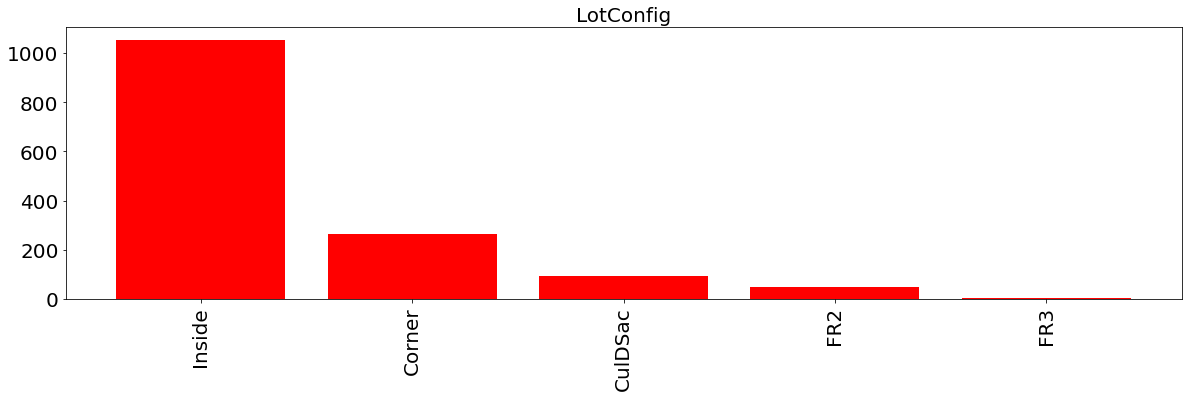




========================================LANDSLOPE======================================== 

  LandSlope  Count
0       Gtl   1382
1       Mod     65
2       Sev     13


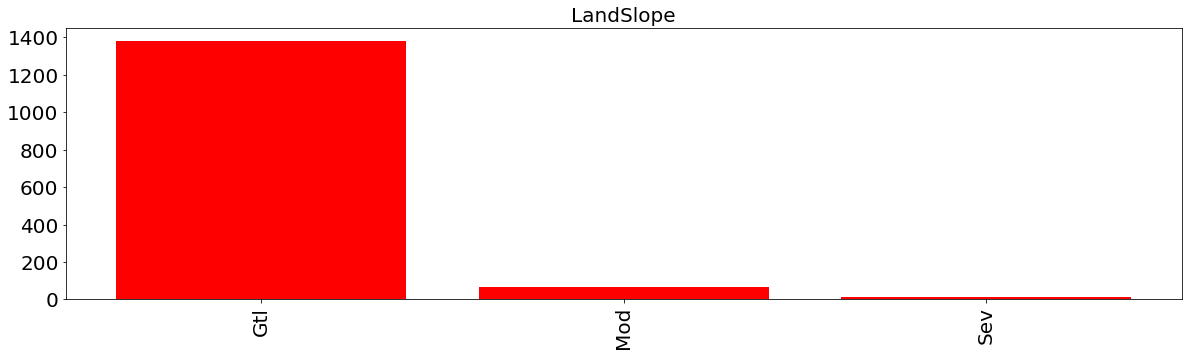




========================================NEIGHBORHOOD======================================== 

   Neighborhood  Count
0         NAmes    225
1       CollgCr    150
2       OldTown    113
3       Edwards    100
4       Somerst     86
5       Gilbert     79
6       NridgHt     77
7        Sawyer     74
8        NWAmes     73
9       SawyerW     59
10      BrkSide     58
11      Crawfor     51
12      Mitchel     49
13      NoRidge     41
14       Timber     38
15       IDOTRR     37
16      ClearCr     28
17      StoneBr     25
18        SWISU     25
19      MeadowV     17
20      Blmngtn     17
21       BrDale     16
22      Veenker     11
23      NPkVill      9
24      Blueste      2


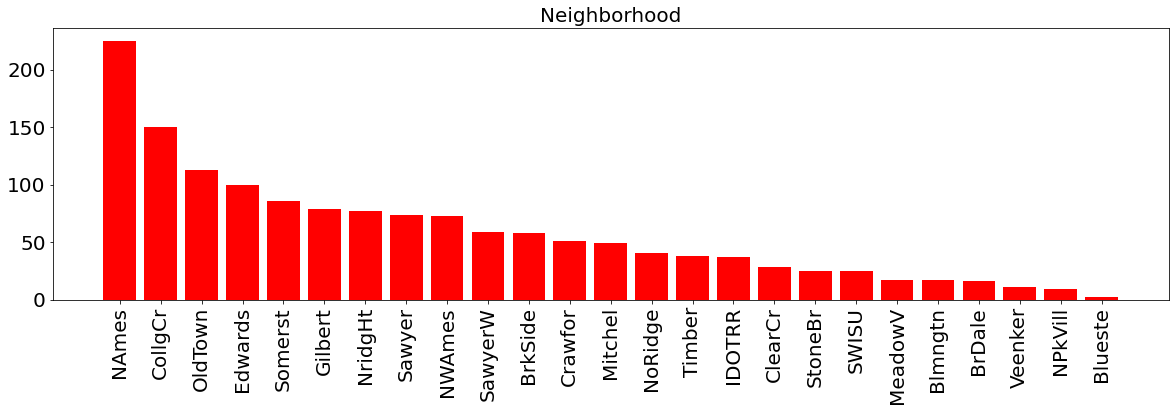




========================================CONDITION1======================================== 

  Condition1  Count
0       Norm   1260
1      Feedr     81
2     Artery     48
3       RRAn     26
4       PosN     19
5       RRAe     11
6       PosA      8
7       RRNn      5
8       RRNe      2


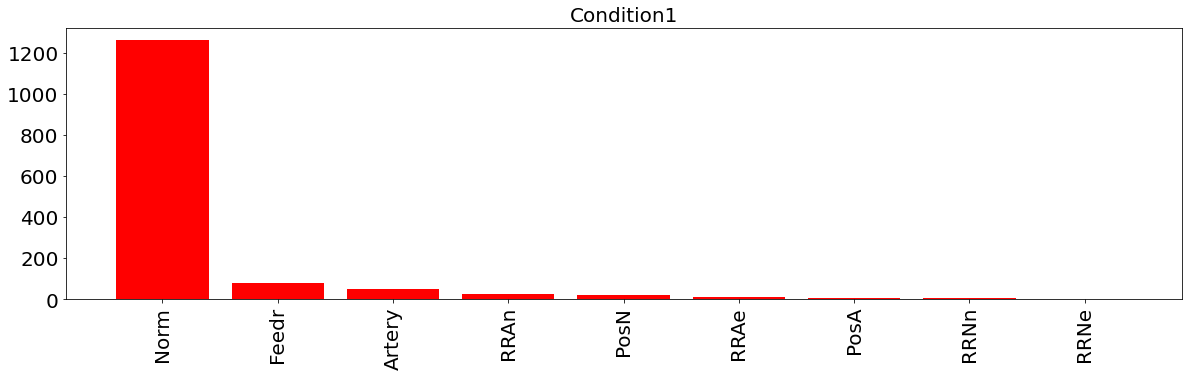




========================================CONDITION2======================================== 

  Condition2  Count
0       Norm   1445
1      Feedr      6
2     Artery      2
3       RRNn      2
4       PosN      2
5       PosA      1
6       RRAn      1
7       RRAe      1


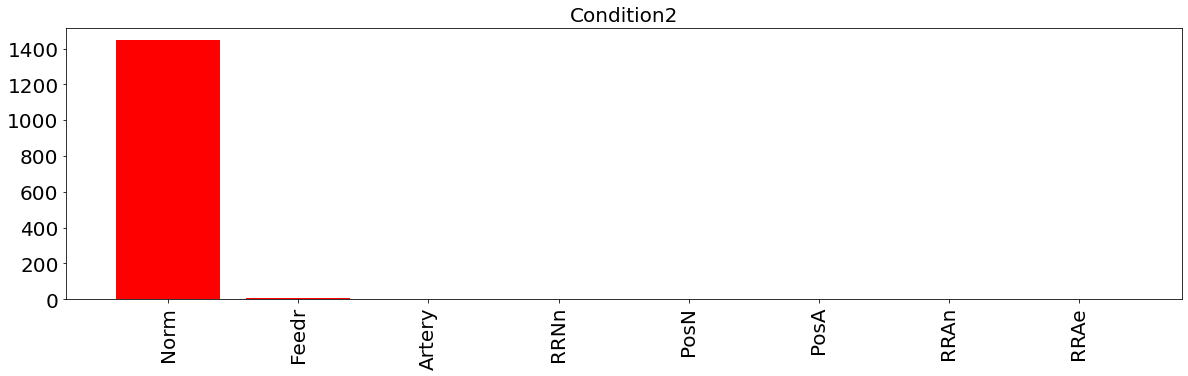




========================================BLDGTYPE======================================== 

  BldgType  Count
0     1Fam   1220
1   TwnhsE    114
2   Duplex     52
3    Twnhs     43
4   2fmCon     31


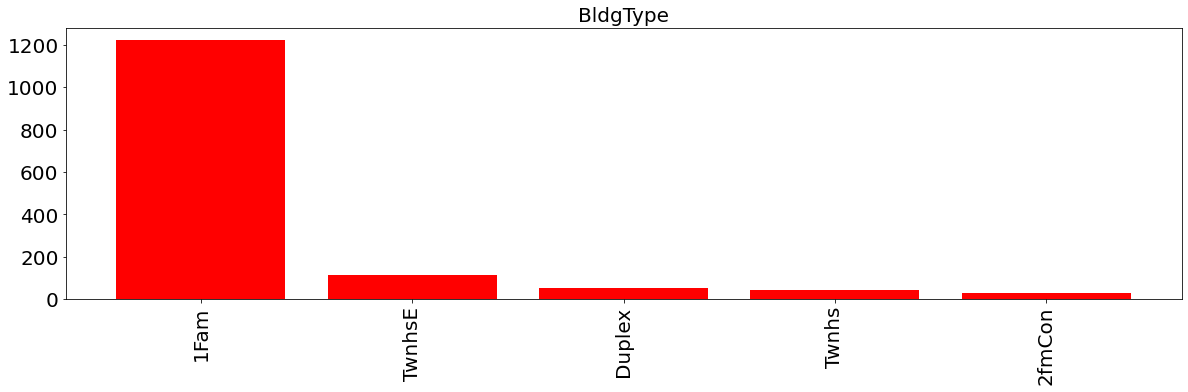




========================================HOUSESTYLE======================================== 

  HouseStyle  Count
0     1Story    726
1     2Story    445
2     1.5Fin    154
3       SLvl     65
4     SFoyer     37
5     1.5Unf     14
6     2.5Unf     11
7     2.5Fin      8


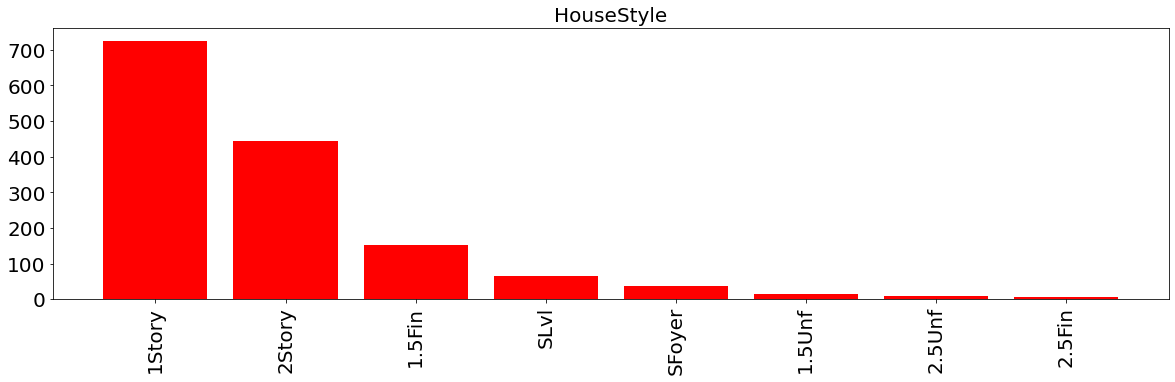




========================================ROOFSTYLE======================================== 

  RoofStyle  Count
0     Gable   1141
1       Hip    286
2      Flat     13
3   Gambrel     11
4   Mansard      7
5      Shed      2


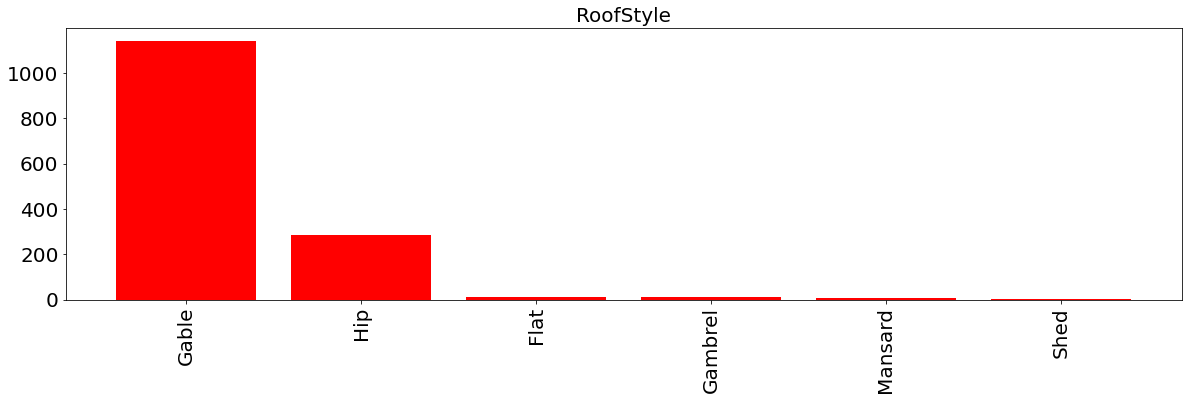




========================================ROOFMATL======================================== 

  RoofMatl  Count
0  CompShg   1434
1  Tar&Grv     11
2  WdShngl      6
3  WdShake      5
4    Metal      1
5  Membran      1
6     Roll      1
7  ClyTile      1


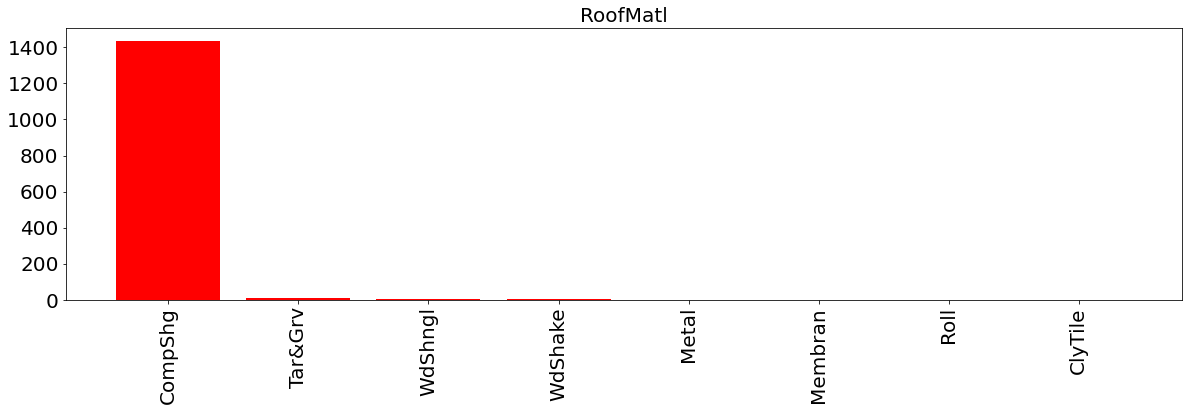




========================================EXTERIOR1ST======================================== 

   Exterior1st  Count
0      VinylSd    515
1      HdBoard    222
2      MetalSd    220
3      Wd Sdng    206
4      Plywood    108
5      CemntBd     61
6      BrkFace     50
7      WdShing     26
8       Stucco     25
9      AsbShng     20
10     BrkComm      2
11       Stone      2
12     AsphShn      1
13     ImStucc      1
14      CBlock      1


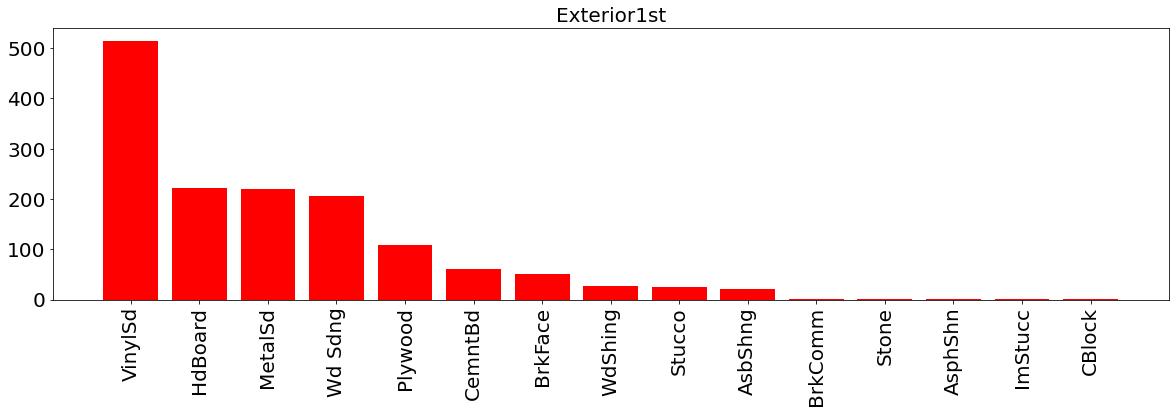




========================================EXTERIOR2ND======================================== 

   Exterior2nd  Count
0      VinylSd    504
1      MetalSd    214
2      HdBoard    207
3      Wd Sdng    197
4      Plywood    142
5      CmentBd     60
6      Wd Shng     38
7       Stucco     26
8      BrkFace     25
9      AsbShng     20
10     ImStucc     10
11     Brk Cmn      7
12       Stone      5
13     AsphShn      3
14       Other      1
15      CBlock      1


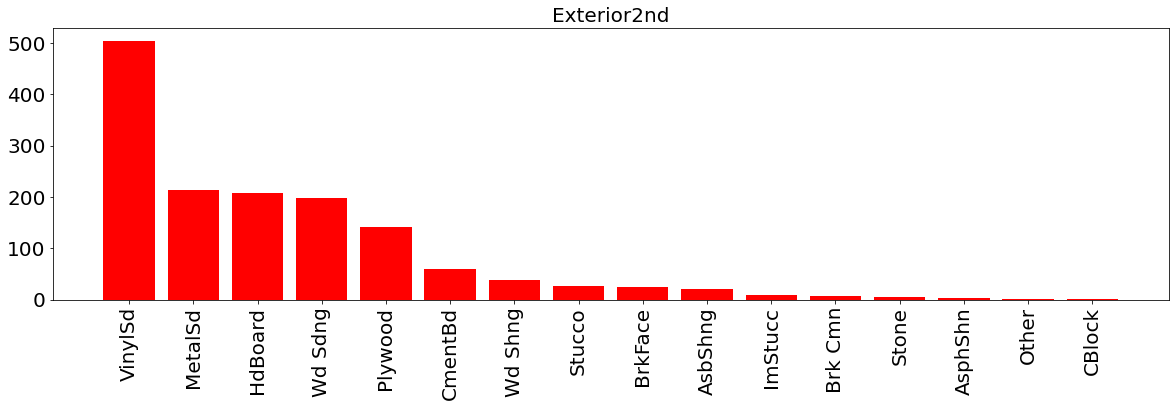




========================================MASVNRTYPE======================================== 

  MasVnrType  Count
0       None    864
1    BrkFace    445
2      Stone    128
3     BrkCmn     15


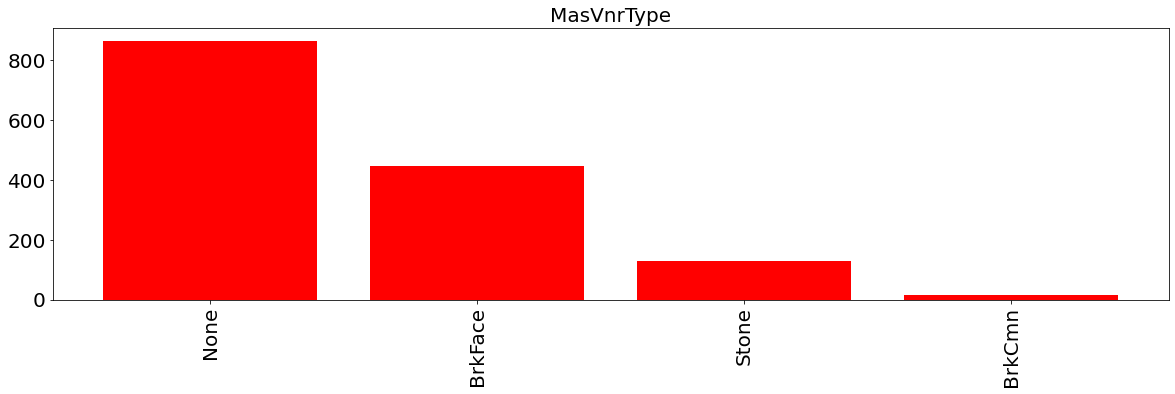




========================================EXTERQUAL======================================== 

  ExterQual  Count
0        TA    906
1        Gd    488
2        Ex     52
3        Fa     14


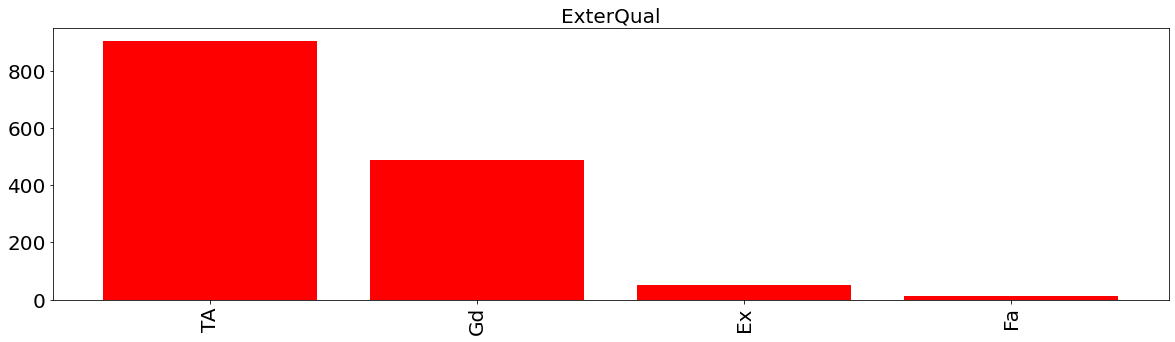




========================================EXTERCOND======================================== 

  ExterCond  Count
0        TA   1282
1        Gd    146
2        Fa     28
3        Ex      3
4        Po      1


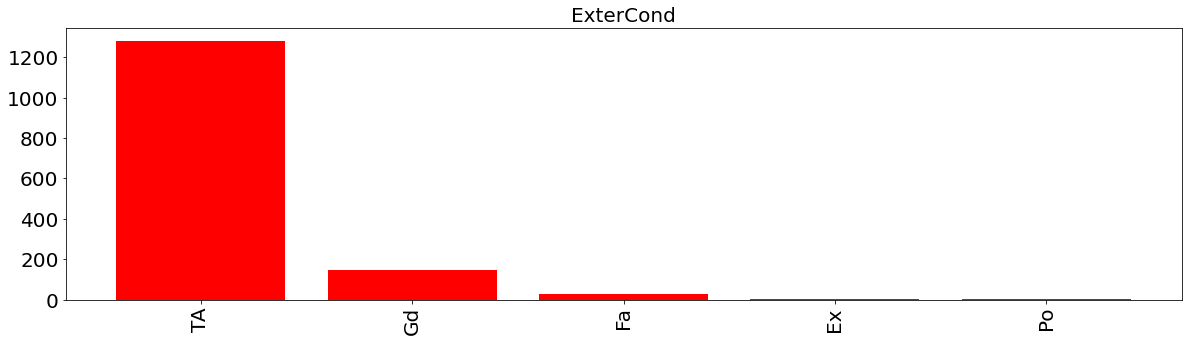




========================================FOUNDATION======================================== 

  Foundation  Count
0      PConc    647
1     CBlock    634
2     BrkTil    146
3       Slab     24
4      Stone      6
5       Wood      3


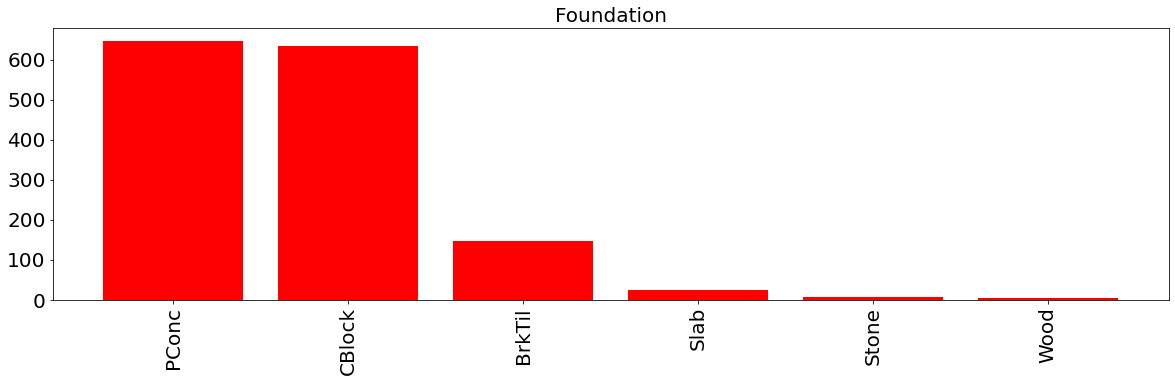




========================================BSMTQUAL======================================== 

  BsmtQual  Count
0       TA    649
1       Gd    618
2       Ex    121
3       Fa     35


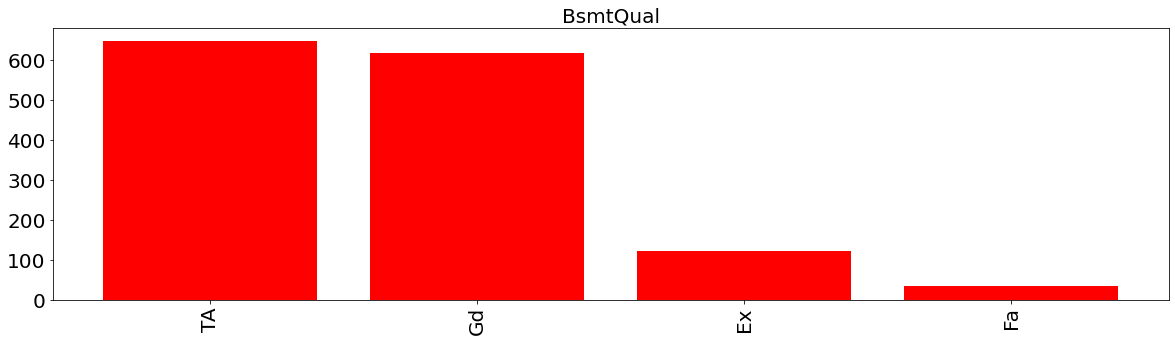




========================================BSMTCOND======================================== 

  BsmtCond  Count
0       TA   1311
1       Gd     65
2       Fa     45
3       Po      2


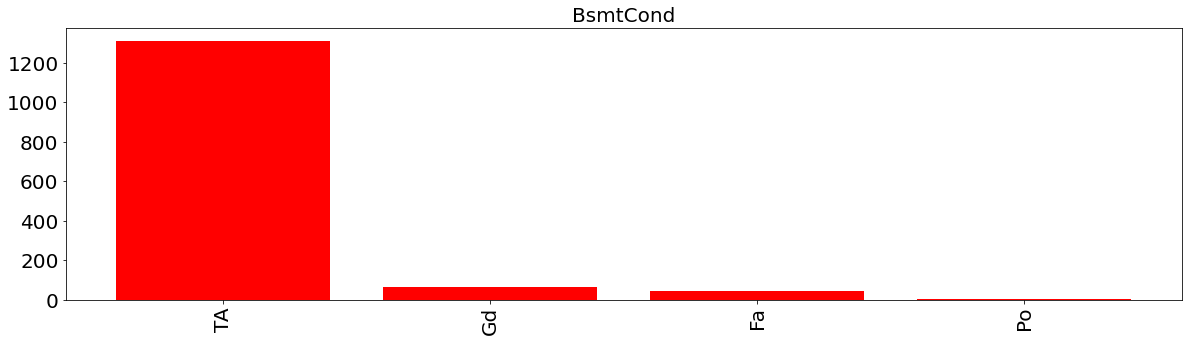




========================================BSMTEXPOSURE======================================== 

  BsmtExposure  Count
0           No    953
1           Av    221
2           Gd    134
3           Mn    114


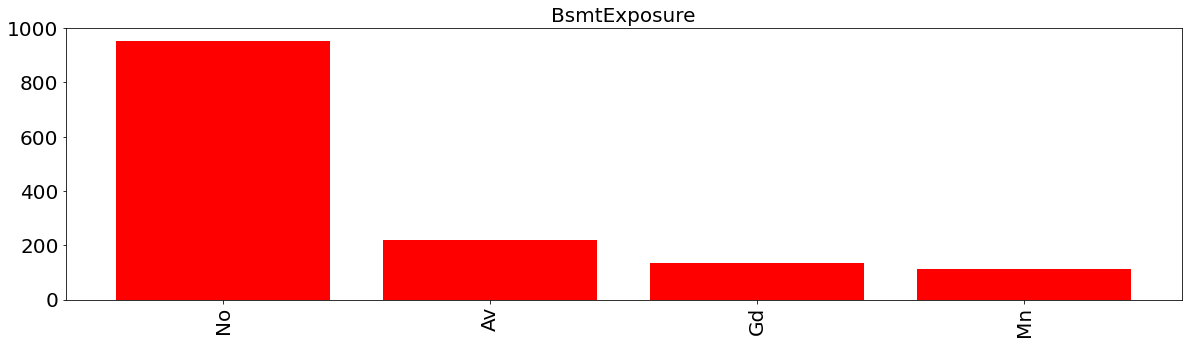




========================================BSMTFINTYPE1======================================== 

  BsmtFinType1  Count
0          Unf    430
1          GLQ    418
2          ALQ    220
3          BLQ    148
4          Rec    133
5          LwQ     74


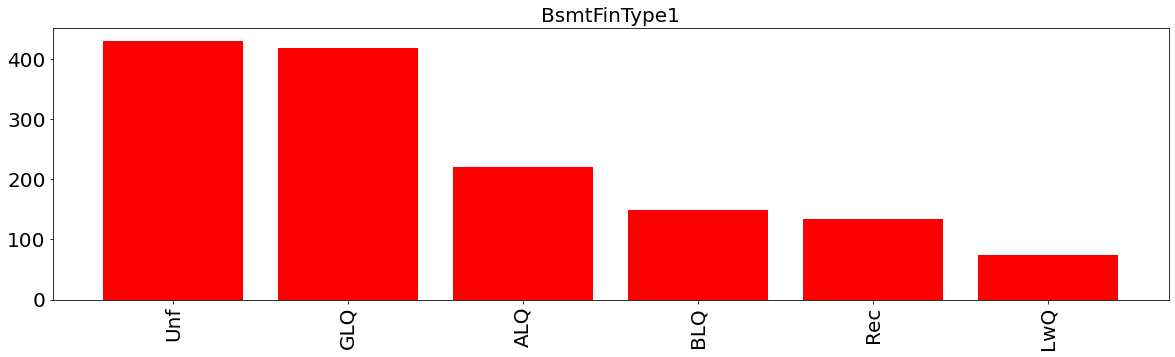




========================================BSMTFINTYPE2======================================== 

  BsmtFinType2  Count
0          Unf   1256
1          Rec     54
2          LwQ     46
3          BLQ     33
4          ALQ     19
5          GLQ     14


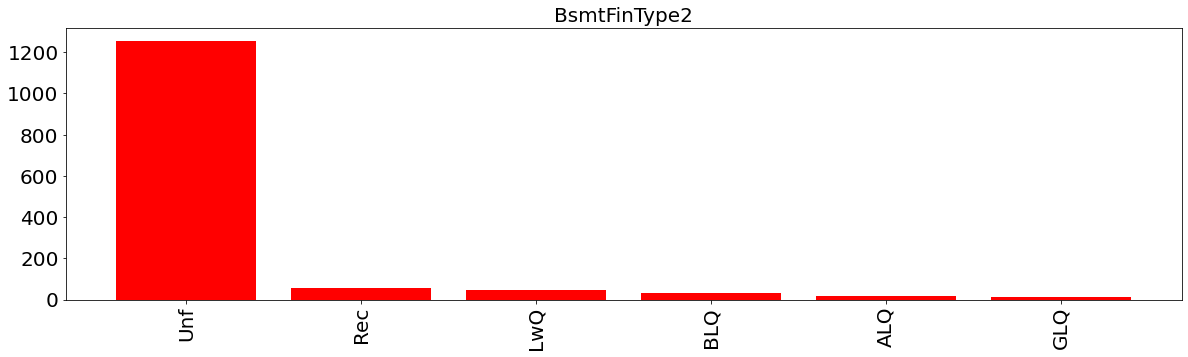




========================================HEATING======================================== 

  Heating  Count
0    GasA   1428
1    GasW     18
2    Grav      7
3    Wall      4
4    OthW      2
5   Floor      1


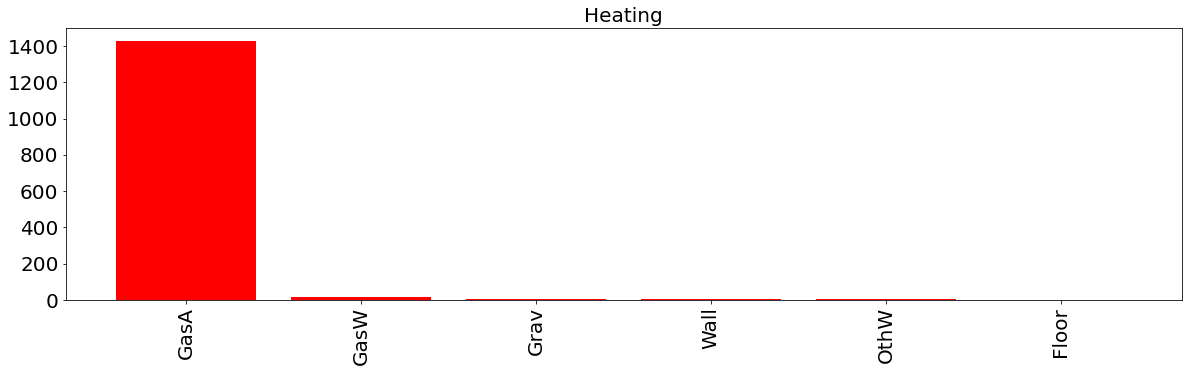




========================================HEATINGQC======================================== 

  HeatingQC  Count
0        Ex    741
1        TA    428
2        Gd    241
3        Fa     49
4        Po      1


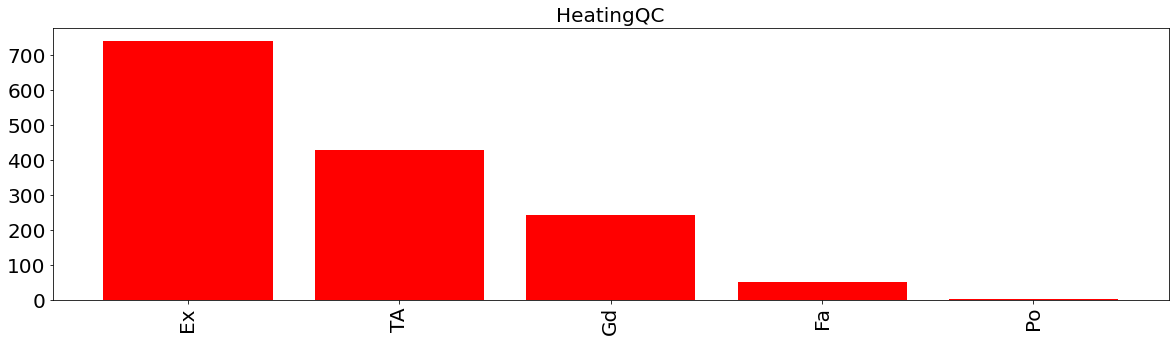




========================================CENTRALAIR======================================== 

  CentralAir  Count
0          Y   1365
1          N     95


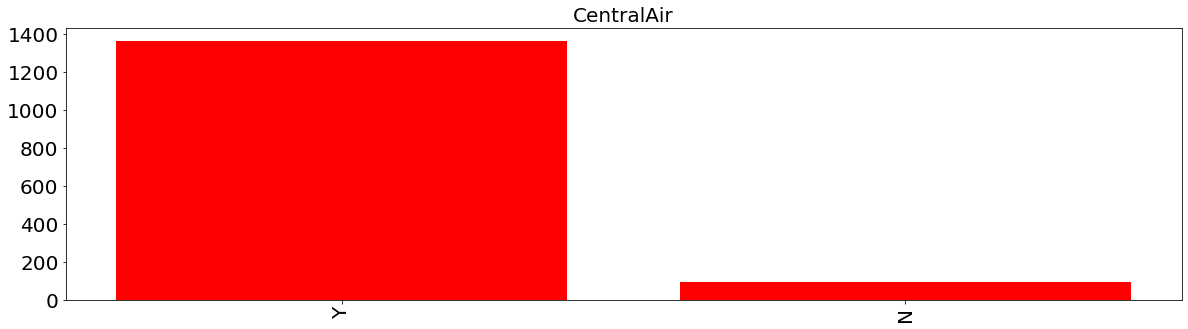




========================================ELECTRICAL======================================== 

  Electrical  Count
0      SBrkr   1334
1      FuseA     94
2      FuseF     27
3      FuseP      3
4        Mix      1


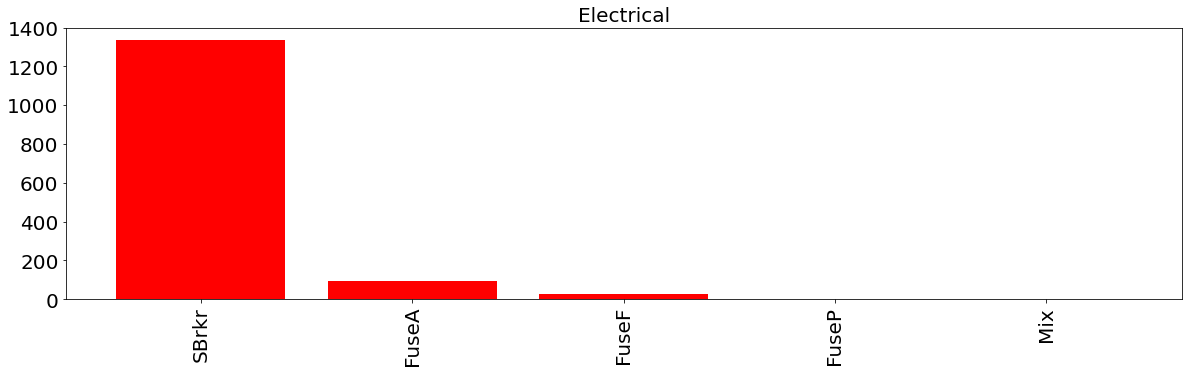




========================================KITCHENQUAL======================================== 

  KitchenQual  Count
0          TA    735
1          Gd    586
2          Ex    100
3          Fa     39


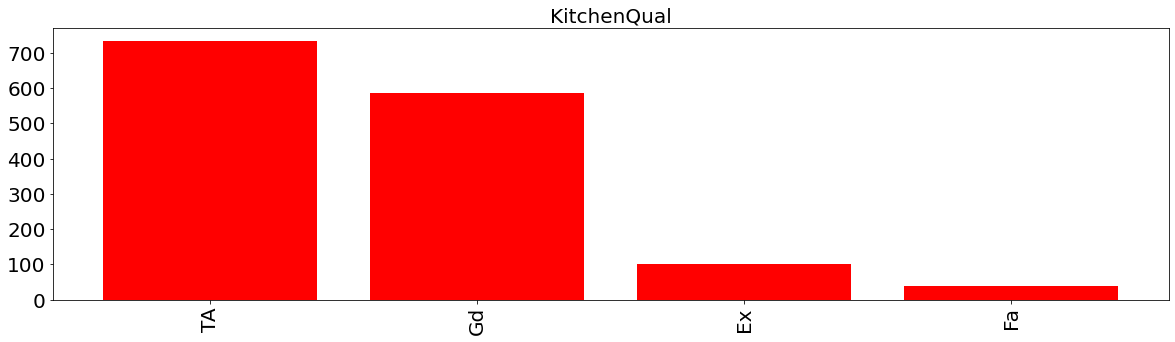




========================================FUNCTIONAL======================================== 

  Functional  Count
0        Typ   1360
1       Min2     34
2       Min1     31
3        Mod     15
4       Maj1     14
5       Maj2      5
6        Sev      1


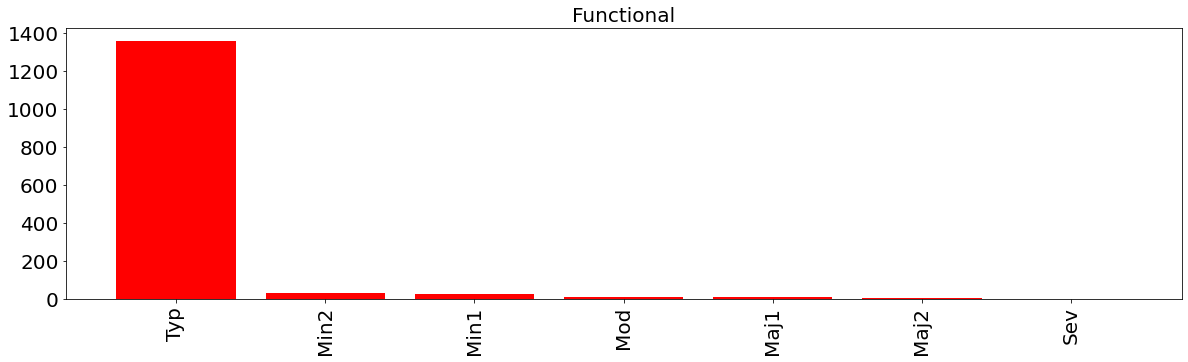




========================================FIREPLACEQU======================================== 

  FireplaceQu  Count
0          Gd    380
1          TA    313
2          Fa     33
3          Ex     24
4          Po     20


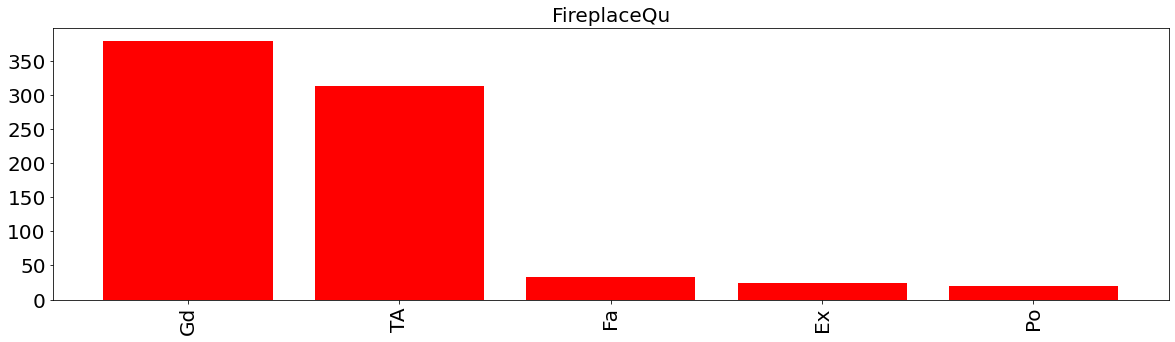




========================================GARAGETYPE======================================== 

  GarageType  Count
0     Attchd    870
1     Detchd    387
2    BuiltIn     88
3    Basment     19
4    CarPort      9
5     2Types      6


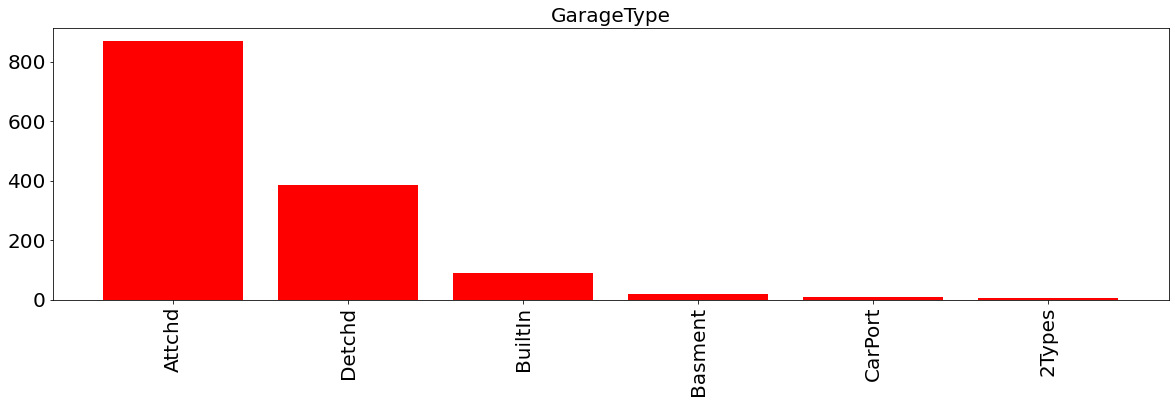




========================================GARAGEFINISH======================================== 

  GarageFinish  Count
0          Unf    605
1          RFn    422
2          Fin    352


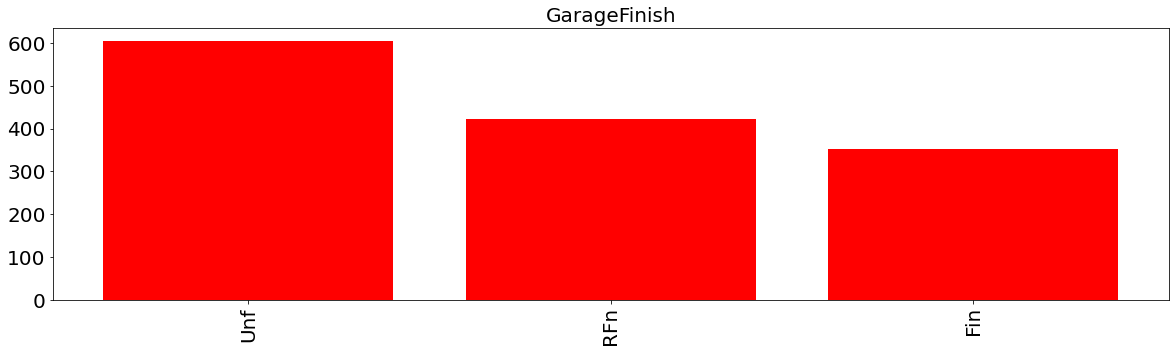




========================================GARAGEQUAL======================================== 

  GarageQual  Count
0         TA   1311
1         Fa     48
2         Gd     14
3         Ex      3
4         Po      3


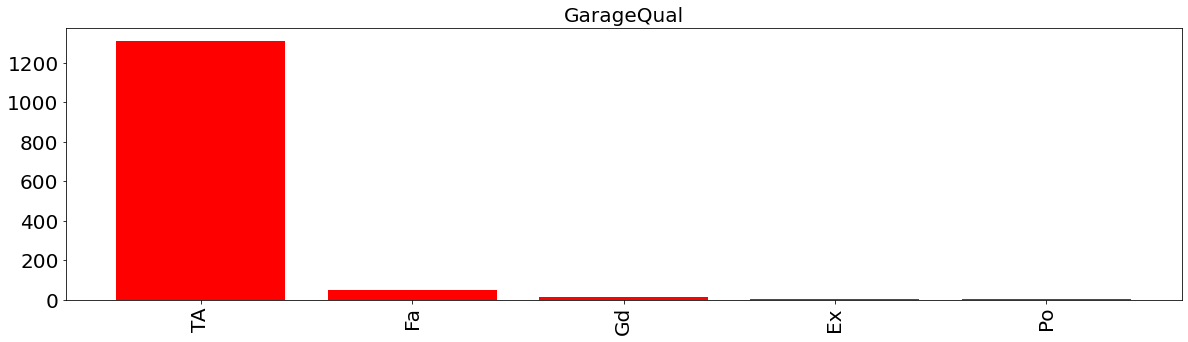




========================================GARAGECOND======================================== 

  GarageCond  Count
0         TA   1326
1         Fa     35
2         Gd      9
3         Po      7
4         Ex      2


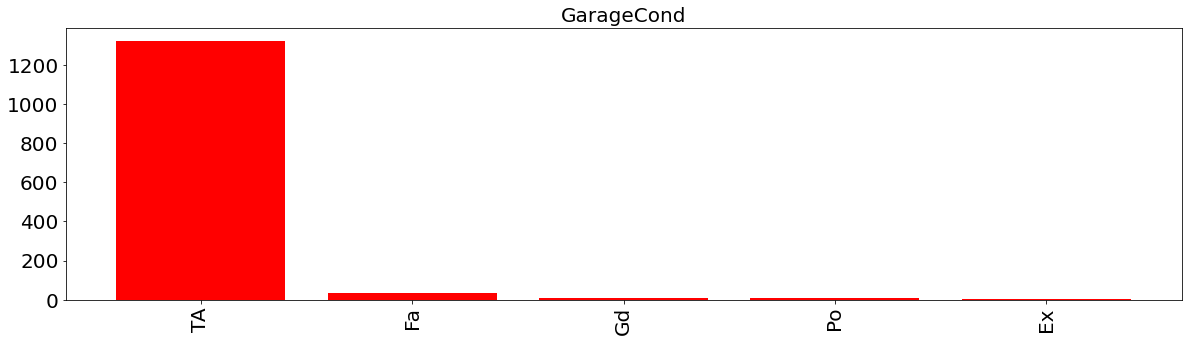




========================================PAVEDDRIVE======================================== 

  PavedDrive  Count
0          Y   1340
1          N     90
2          P     30


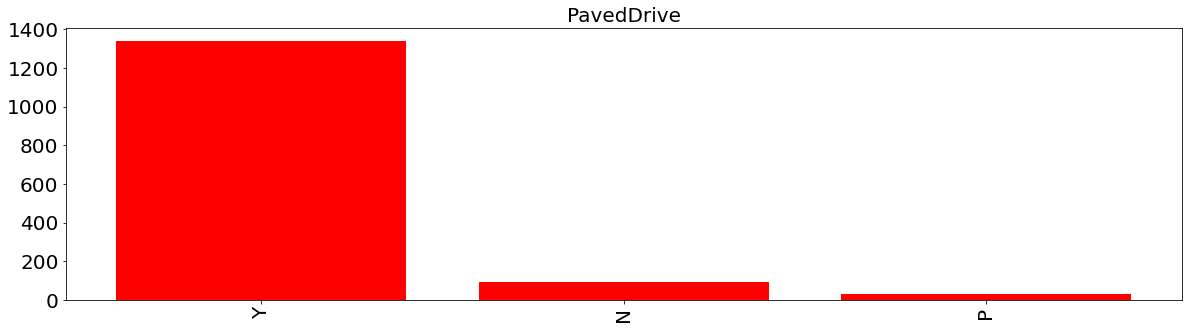




========================================POOLQC======================================== 

  PoolQC  Count
0     Gd      3
1     Ex      2
2     Fa      2


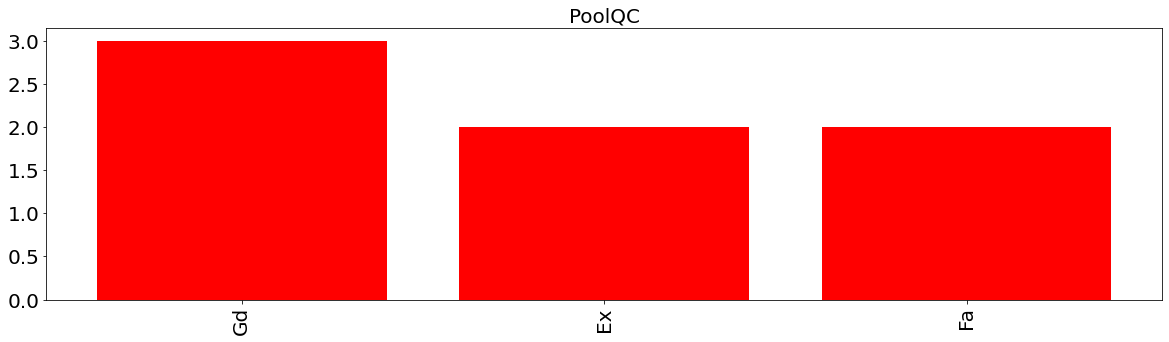




========================================FENCE======================================== 

   Fence  Count
0  MnPrv    157
1  GdPrv     59
2   GdWo     54
3   MnWw     11


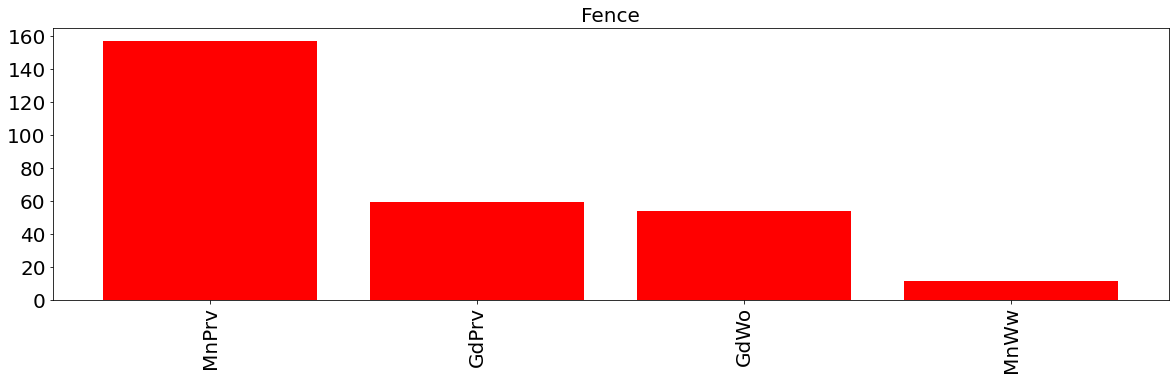




========================================MISCFEATURE======================================== 

  MiscFeature  Count
0        Shed     49
1        Gar2      2
2        Othr      2
3        TenC      1


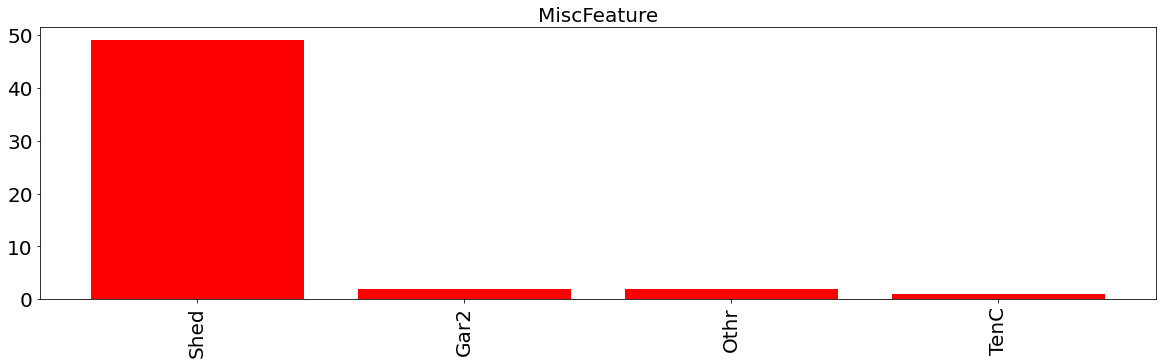




========================================SALETYPE======================================== 

  SaleType  Count
0       WD   1267
1      New    122
2      COD     43
3    ConLD      9
4    ConLI      5
5    ConLw      5
6      CWD      4
7      Oth      3
8      Con      2


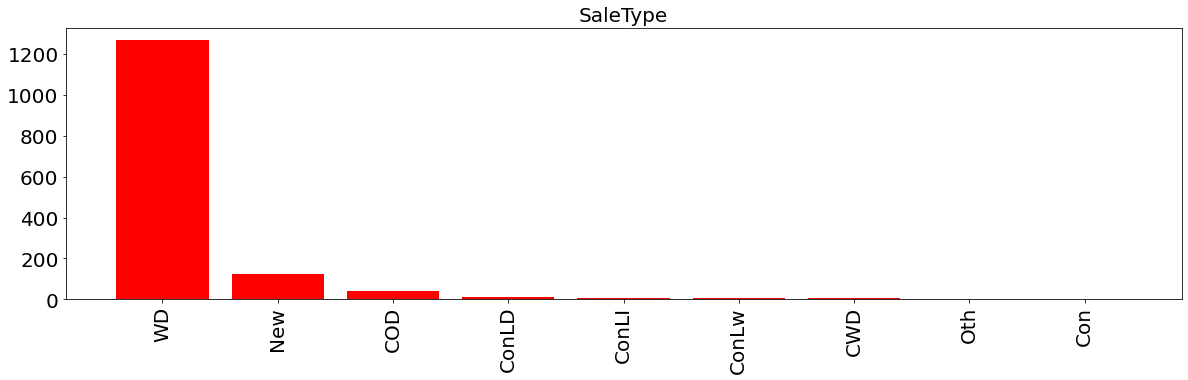




========================================SALECONDITION======================================== 

  SaleCondition  Count
0        Normal   1198
1       Partial    125
2       Abnorml    101
3        Family     20
4        Alloca     12
5       AdjLand      4


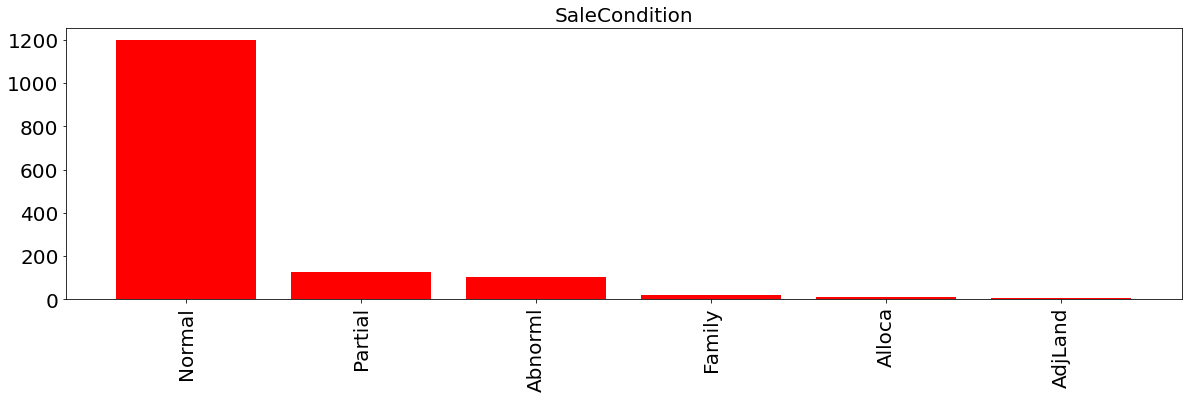

In [34]:
df_cualitativas = df[['Street', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                      'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle','RoofStyle', 
                      'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
                      'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                      'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
                      'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive','PoolQC', 'Fence', 'MiscFeature', 
                      'SaleType', 'SaleCondition']]

for columna in df_cualitativas.columns:
    print("========================================" + columna.upper() + "======================================== \n")
    count = df_cualitativas[columna].value_counts().sort_values(ascending=False).reset_index()
    count = count.rename(columns={"index": columna, columna: "Count"})
    print(count)
 
    plt.figure(figsize=(20,5))
    plt.bar(count[columna], count['Count'], color='r')
    plt.title(columna, size=20)
    plt.xticks(rotation=90, size=20)
    plt.yticks(size=20)
    plt.show()
    print("\n\n")